# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:

    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [4]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file: #apre il file concatenando filepath e filename
       data_file = csv.reader(csv_file,delimiter=',') #legge il file csv separando i campi con ,
       """
        next(): accede alla prossima riga del datafile
       La prima riga la mettiamo in temp1 che è una lista composta da 2 fields: 
       - temp1[0]: contiene il n° degli esempi che salviamo in n_samples
       - temp1[1]: contiene il n° di feature e lo mettiamo in n_features
       """
       temp1 = next(data_file) #primo rigo in temp1
       n_samples = int(temp1[0]) #temp1[0] contiene n° esempi
       print("n_samples = {}".format(n_samples)) # 
       n_features = int(temp1[1]) # temp1[1]: contiene il n° di feature
       temp2 = next(data_file) #la seconda riga di datafile contiene il nome delle feature es X e Y
       feature_names = np.array(temp2[:n_features]) #la seconda riga contiene i nomi delle features

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="C:\\Users\\silve\\Desktop\\Machine Learning Esercizi\\dataset"
file_path="/content/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples = 150
n_samples = 6118
n_samples = 86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

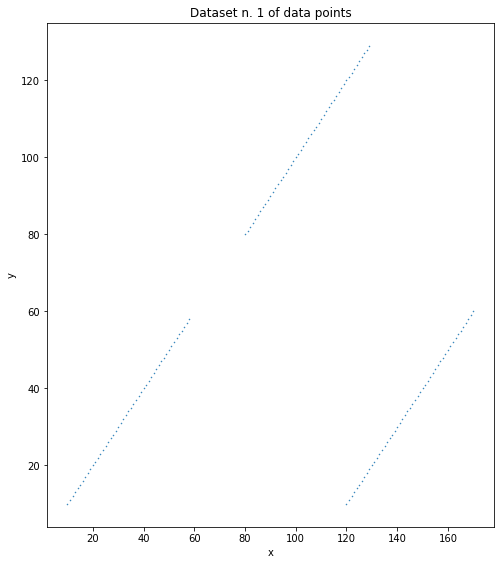

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

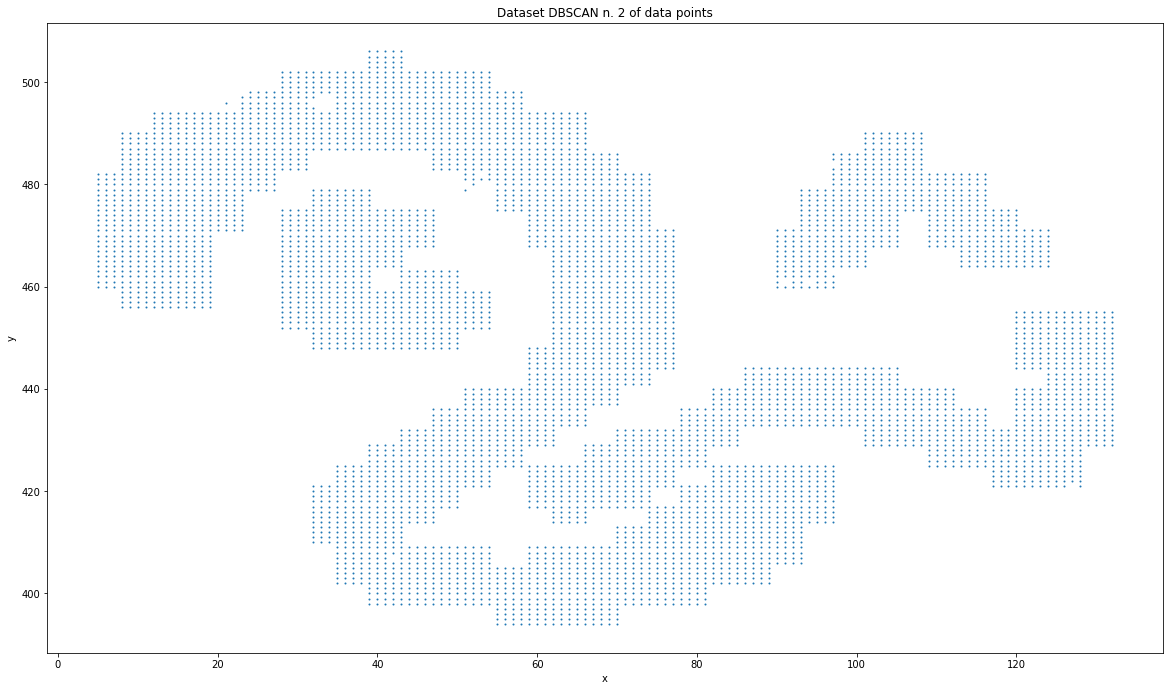

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset DBSCAN n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

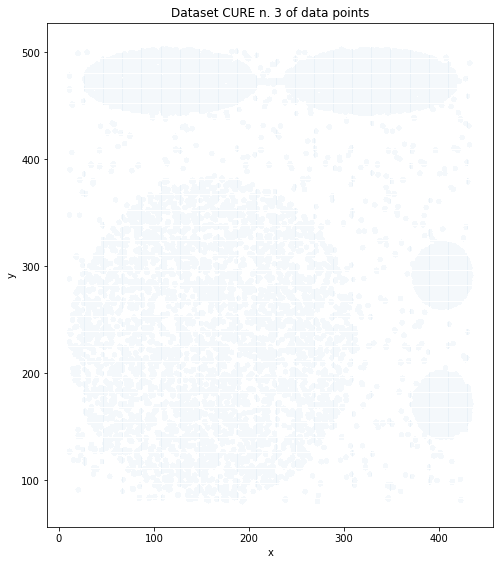

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset CURE n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=0.5, markeredgecolor = 'none')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [8]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="C:\\Users\\silve\\Desktop\\Machine Learning Esercizi\\dataset"
file_path="/content/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3 #importo il n° k dei cluster che voglio trovare a 3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

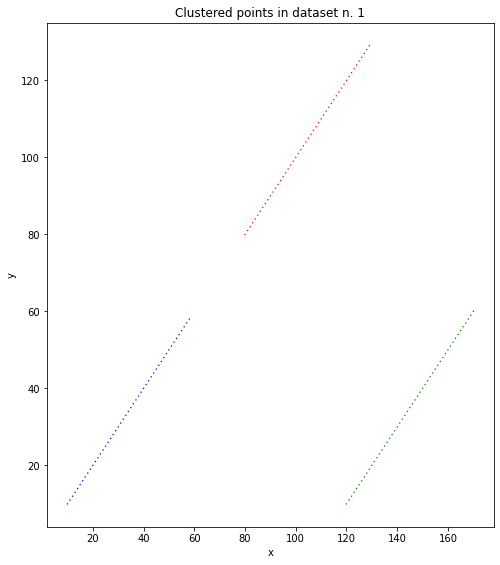

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=1)

plt.show()

#Esercizio 1 In the following cell we perform clustering with K-means on dataset2

In [10]:
# Il secondo dataset è formato da 4 cluster
k=4
kmeans2 = KMeans(n_clusters=k).fit(data2)

#Esercizio 2 In the following we plot clustering results on dataset2

In [11]:
colors=['b','g','r','c','m','y','k','w']

def plot_model(kmeans, data, title, size=(10,10), msize=1):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    c = [colors[l] for l in kmeans.labels_] #labels_ contiene le etichette assegnate ad ogni esempio
    cntrs = kmeans.cluster_centers_ #_centers_ contiene i centroidi di ogni esempio
    plt.scatter(data[:,0], data[:,1], s=msize, c=c, marker='.') # dati
    plt.scatter(cntrs[:,0], cntrs[:,1], s=msize+40, c='k', marker='o') # centroidi
    
    plt.show()

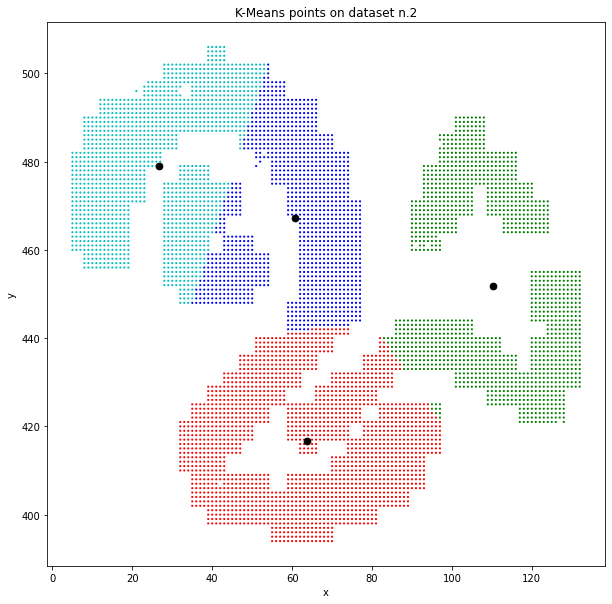

In [12]:
plot_model(kmeans2, data2, "K-Means points on dataset n.2", msize=5)

#Esercizio 3 We perform clustering with K-means on the remaining dataset3

In [13]:
# Il 3° dataset è formato da 4 (o 5) cluster
k = 4
kmeans3a = KMeans(n_clusters=k).fit(data3)
k = 5
kmeans3b = KMeans(n_clusters=k).fit(data3)

#Esercizio 4 In the following we plot clustering results on dataset3

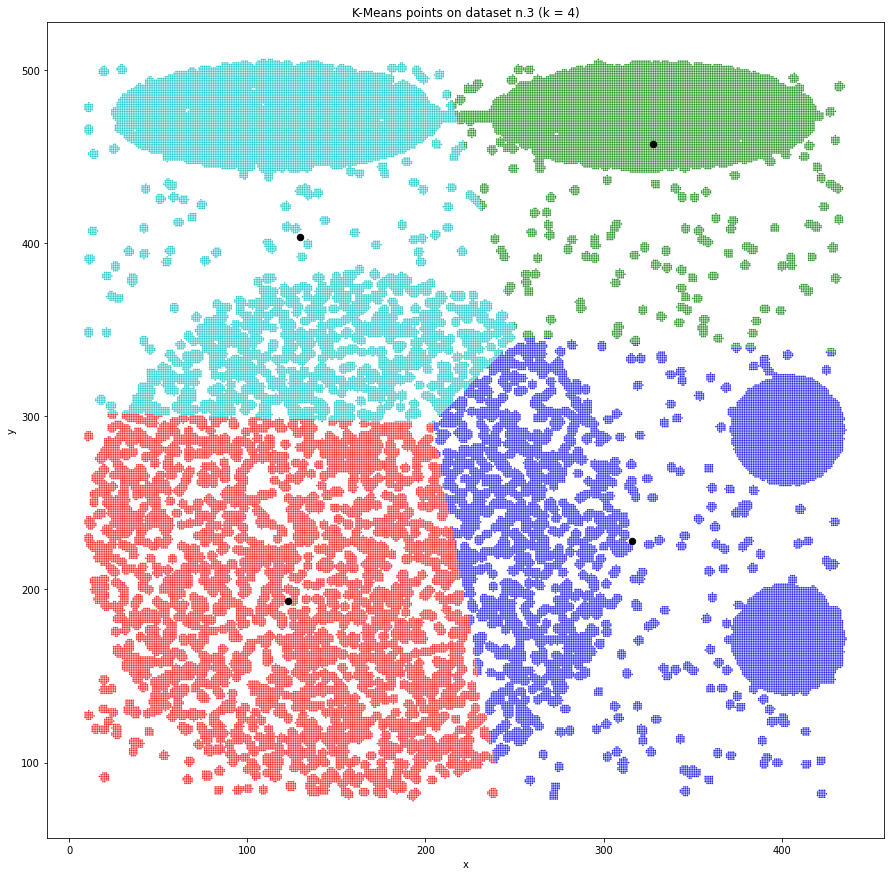

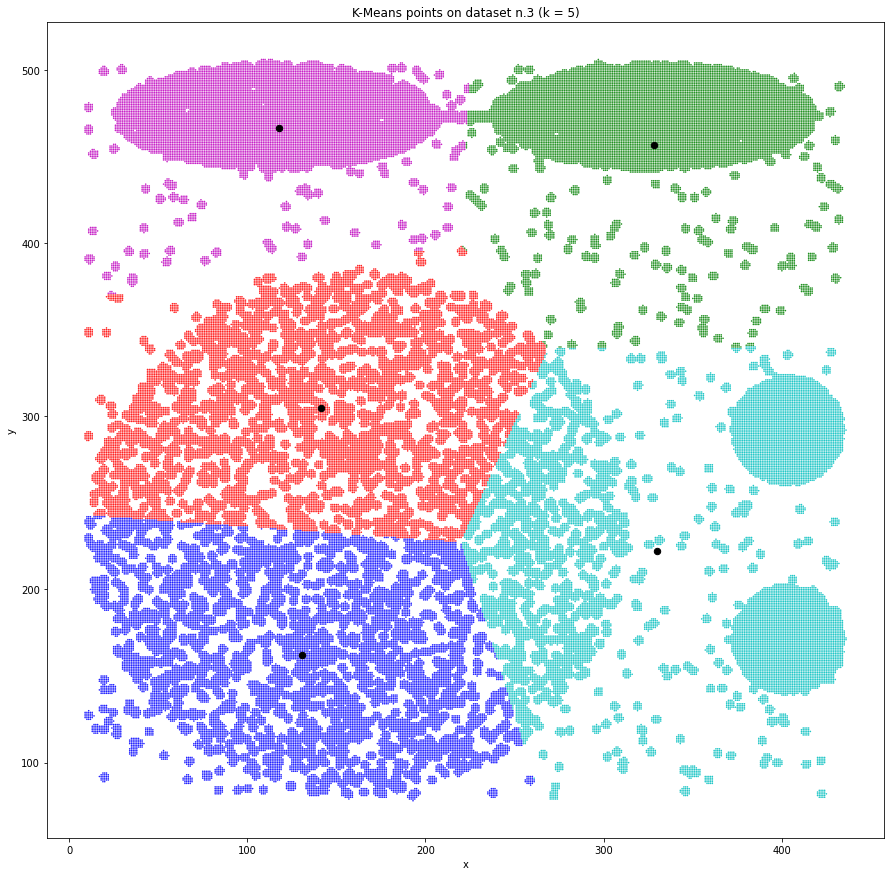

In [14]:
plot_model(kmeans3a, data3, "K-Means points on dataset n.3 (k = 4)", size=(15,15))
plot_model(kmeans3b, data3, "K-Means points on dataset n.3 (k = 5)", size=(15,15))

# Esercizio 5 In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [15]:
from sklearn.metrics import silhouette_score
"""
-----------------TEMPI DI ESECUZIONE--------------------
Prestazioni del k-means sui vari dataset:
1° < 5 secondi (150 esempi)
2° tra i 10 e i 20 secondi (6000 esempi circa)
3° circa 2 minuti (80000 esempi circa)
"""
#datasets = [data1]
datasets = [data1, data2, data3]
k_val = np.arange(2, 9, 1) #provo i possibili valori di k nell'intervallo tra 2 e 9 escluso distanziati di 1, quindi [2,3,4,5,6,7,8]
#scores salva gli scores di OGNI esecuzione del k-means con 7 valori di k dievrsi su OGNI dataset ed è una matrice
scores = np.zeros((len(datasets),len(k_val), 1)) #inizializzo array degli score a zero e
"""
     _D1____D2___D3__
K=2 |__*__|____|____| J=0
    |_____|____|____|
    |_____|____|____|
    |_____|____|____|
    |_____|____|____|
    |_____|____|____|
K=8 |_____|____|____| J=6

dove * è lo score del k means sul dataset 1 con k=2
"""
for i, data in enumerate(datasets): # per ogni dataset
    print("Dataset {}".format(i+1)) #stampa  il nome del dataset corrente
    best_sil_score = -1 #inizializzo silhouette score
    best_k = -1 #inizializzo il migliore k
    #j rappresenta la posizione dello score nell'array del database i-esimo nella matrice score
    #k rappresenta il k del k-means che stiamo provando
    for j, k in enumerate(k_val):#j parte da 0 e arriva a 6 mentre k parte da 2 e arriva a 8 ( incrementando di 1 entrambi a ogni ciclo)
       
        for _ in range(10):
            # numero random per inizializzare i centroidi
            kmeans = KMeans(n_clusters=k, random_state=np.random.randint(999)).fit(data) #fitting dei dati
            labels = kmeans.predict(data) #fa le labels
            score = silhouette_score(data, labels, metric='euclidean', sample_size = 100) #calcola lo score
            # print(score)
            if score > best_sil_score: #se lo score appena calcolato è migliore lo salvo e salvo anche k
                best_sil_score = score
                best_k = k
        # print(score)
        scores[i,j] = score #salvo nella matrice degli sscore dei dataset lo score attuale
    print("Best silhouette score: {}".format(best_sil_score))
    print("Best k: {}".format(best_k))
    print("-" * 30) #modo pythonesco per stampare '------------------------------'
# print(scores)

Dataset 1
Best silhouette score: 0.7376026779081016
Best k: 3
------------------------------
Dataset 2
Best silhouette score: 0.5661142063307882
Best k: 3
------------------------------
Dataset 3
Best silhouette score: 0.5006477061973468
Best k: 8
------------------------------


#Esercizio 6  As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with an increasing value of k (the number of clusters) so that the best value of k can be selected.

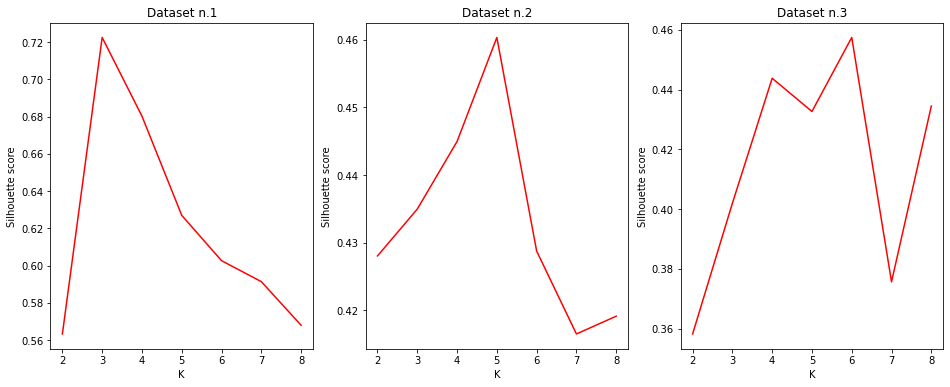

In [16]:
#Prendiamo la matrice degli score calcolata al punto precedente e plottiamo il risultato
f, axes = plt.subplots(1, 3)
f.set_figheight(6)
f.set_figwidth(16)
for i, ax in enumerate(axes):
    ax.plot(k_val, scores[i], color='red')
    ax.set_title("Dataset n.{}".format(i+1))
    ax.set_xlabel("K")
    ax.set_ylabel("Silhouette score")

#Esercizio 7 In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3.

At the beginning try using a pair of Minpts and Eps of your choice.

Note: If the data is too big, sample it random, using a factor of 0.1.


In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np

colors=['b','g','r','c','m','y','k']

#Plotta il risultato del clustering con DBSCAN
def plot_model(dbscan, data, title, size=(6,6), msize=10):
    #inizializzo i parametri per fare lo scatter plot (scatter plot è il grafico con i puntini)
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

    # label = -1 significa noisy point
    n_noise = list(dbscan.labels_).count(-1) # quindi conto tutte le occorrenze dei noisy point
    print("Numero di punti: {}".format(len(data)))
    print("Numero di noisy point: {}".format(n_noise))
    #Conto il n° di cluster, a cui sottraggo 1 se ci sono dei punti di noise, altrimenti sottraggo 0 e lascio come sta
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    print("Numero di cluster trovati: {}".format(n_clusters))
    #SE PROBLEMI CON COLORI DEI CLUSTER DECOMMENTARE RIGA SOTTO E METTERE C=C NELLO SCATTER
    #c = [colors[l] for l in dbscan.labels_] #labels_ contiene le etichette assegnate ad ogni esempio
    plt.scatter(data[:,0], data[:,1], s=msize, c=dbscan.labels_.astype(float), marker='.') # dati
    

 

#Recheability distance è la distanza a cui incontriamo l'n-esimo neighbour
def reachability_distance(n_neighbors, data):
    neigh = NearestNeighbors(n_neighbors=n_neighbors+1).fit(data)

    """
    Con questa istruzione distances conterrà tanti array quanti gli elementi del dataset e
    ogni array avrà in prima posizione [0] perché è la distanze del punto da sé stesso,
    in posizione 1 la distanza dal 1° vicino, in 2 la distanza dal secondo ecc...

    distances=[
      [0, distanza_vicino1, distanza_vicino2,..., distanza_vicino_n], #punto 1
      [0, distanza_vicino1, distanza_vicino2,..., distanza_vicino_n], #punto 2
      ...
      [0, distanza_vicino1, distanza_vicino2,..., distanza_vicino_n], #punto k
      ]
    """
    distances, _ = neigh.kneighbors(data)  
    
    # elimino la prima colonna in quanto essa contiene la distanza del punto con se stesso (=0)
    distances = np.delete(distances, 0, 1)
    """
    ora distances è così
     distances=[
      [distanza_vicino1, distanza_vicino2,..., distanza_vicino_n], #punto 1
      [distanza_vicino1, distanza_vicino2,..., distanza_vicino_n], #punto 2
      ...
      [distanza_vicino1, distanza_vicino2,..., distanza_vicino_n], #punto k
      ]
    """
    
    # prendo la distanza del punto più lontano
    distances = np.max(distances, axis=1) # axis=1 mean riga per riga
    """
    Ora distances è così:
    [max_distanze_punto1, max_distanze_punto2,..., max_distanze_puntok]
    """
    # ordino in base alla distanza
    distances = np.sort(distances, axis=0)
    plt.plot(distances)
    

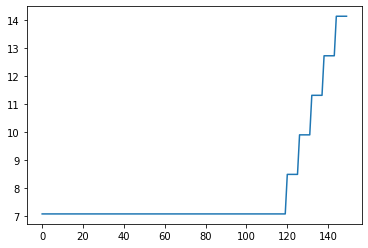

In [18]:
#Userò il valore del gomito di questo grafico per l'epsilone del DBSCAN successivo
reachability_distance(n_neighbors=10, data=data1)


Numero di punti: 150
Numero di noisy point: 0
Numero di cluster trovati: 3


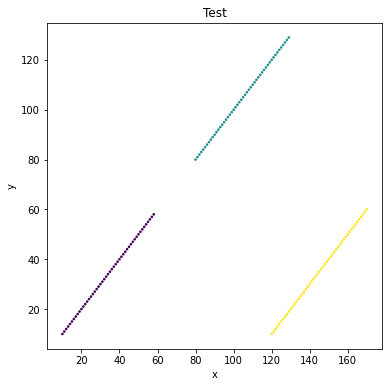

In [19]:
dbscan = DBSCAN(eps = 8, min_samples = 10).fit(data1) #inizializzo il modello DBSCAN con Eps=8 e Minpts= 10
plot_model(dbscan, data1, "Test") #funzione ausiliaria per plottare il risultato

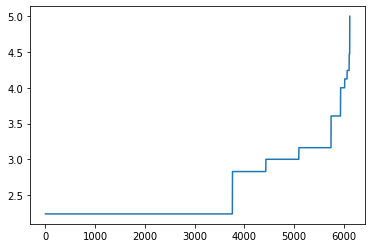

In [20]:
#DATASET 2
reachability_distance(n_neighbors=20, data=data2)

Numero di punti: 6118
Numero di noisy point: 115
Numero di cluster trovati: 4


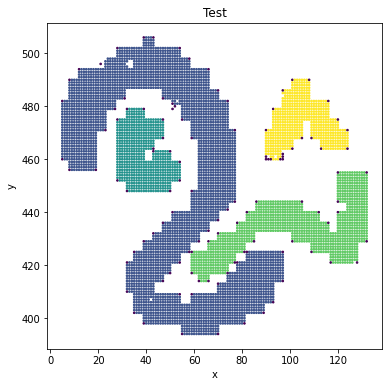

In [21]:
dbscan = DBSCAN(eps = 2.3, min_samples = 20).fit(data2)
plot_model(dbscan, data2, "Test")

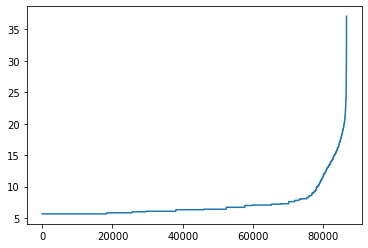

In [22]:
#DATASET 3
reachability_distance(n_neighbors=100, data=data3)

[-1 -1 -1 ...  4  3  3]
Numero di punti: 86558
Numero di noisy point: 7653
Numero di cluster trovati: 5


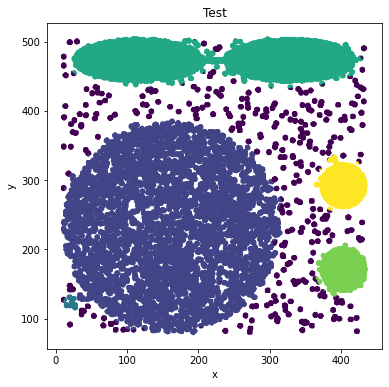

In [25]:
dbscan = DBSCAN(eps = 8, min_samples = 100).fit(data3)
print(dbscan.labels_)
plot_model(dbscan, data3, "Test")